## **Data Visualization with ggplot2**

# tidyverse
The tidyverse is an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures.

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



That one line of code loads the core tidyverse, packages that you will
use in almost every data analysis. It also tells you which functions
from the tidyverse conflict with functions in base R (or from other
packages you might have loaded).
If you run this code and get the error message “there is no package
called ‘tidyverse’,” you’ll need to first install it, then run library()
once again.

You only need to install a package once, but you need to reload it
every time you start a new session.
If we need to be explicit about where a function (or dataset) comes
from, we’ll use the special form package::function(). For example,
ggplot2::ggplot() tells you explicitly that we’re using the
ggplot() function from the ggplot2 package.

# A Case Study: Do cars with big engines use more fuel than cars with small engines? 
We will use the mpg data frame for this case study. mpg contains observations collected by the US Environment Protection Agency on 38 models of cars:

In [ ]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


Among the variables in mpg are:

• displ, a car’s engine size, in liters.

• hwy, a car’s fuel efficiency on the highway, in miles per gallon
(mpg). 

A car with a low fuel efficiency consumes more fuel than
a car with a high fuel efficiency when they travel the same distance.

Otrher  variables are  : manufacturer, 	model	, displ	, year,	cyl	, trans,	drv	cty	, hwy	,fl	,class

# Creating a ggplot
To plot mpg, run the following code to put displ on the x-axis and hwy on the
y-axis:


# geom_point
The point geom is used to create scatterplots. The scatterplot is most useful for displaying the relationship between two continuous variables. It can be used to compare one continuous and one categorical variable, or two categorical variables, but a variation like geom_jitter(), geom_count(), or geom_bin2d() is usually more appropriate. A bubblechart is a scatterplot with a third variable mapped to the size of points.

https://ggplot2.tidyverse.org/reference/geom_point.html

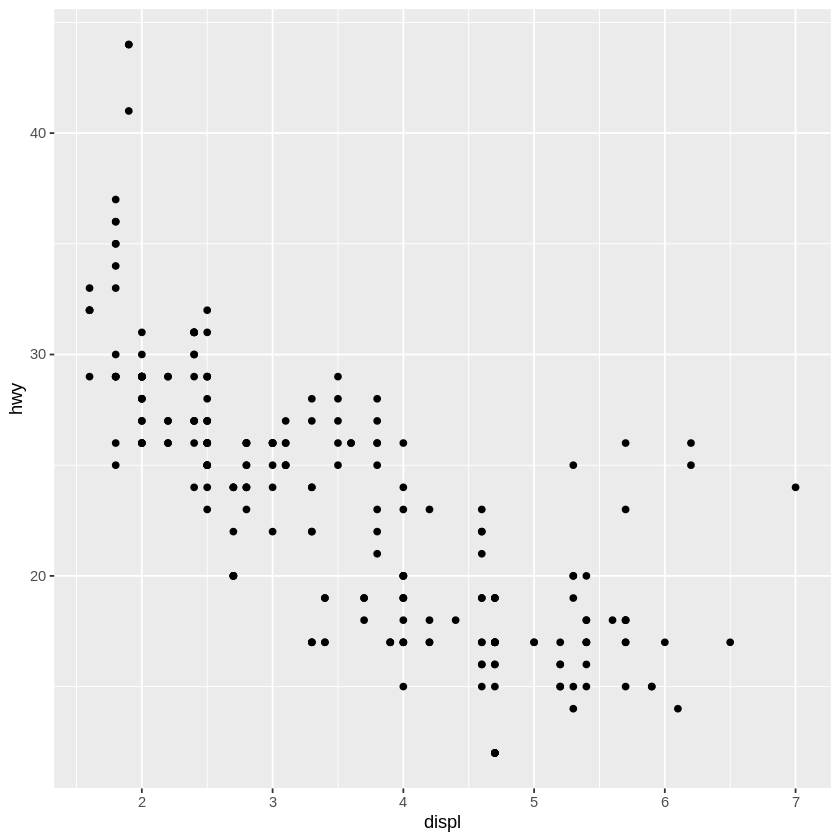

In [ ]:
# The first argument of ggplot() is the dataset to use in the graph. So ggplot(data = mpg) creates an empty graph, 
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy))

## The plot shows a negative relationship between engine size (displ) and fuel efficiency (hwy).In other words, cars with big engines use more fuel. 

You complete your graph by adding one or more layers to ggplot().
The function geom_point() adds a layer of points to your plot, which creates a scatterplot.ggplot2 comes with many geom functions that each add a different type of layer to a plot. You’ll learn a whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with aes(), and the x and y arguments of aes() specify which variables to map to the xand y-axes. ggplot2 looks for the mapped variable in the data argument, in this case, mpg.



Let's prctice some exercises with the variables available the mpg dataframe.

## Excercise: Make a scatterplot of hwy versus cyl

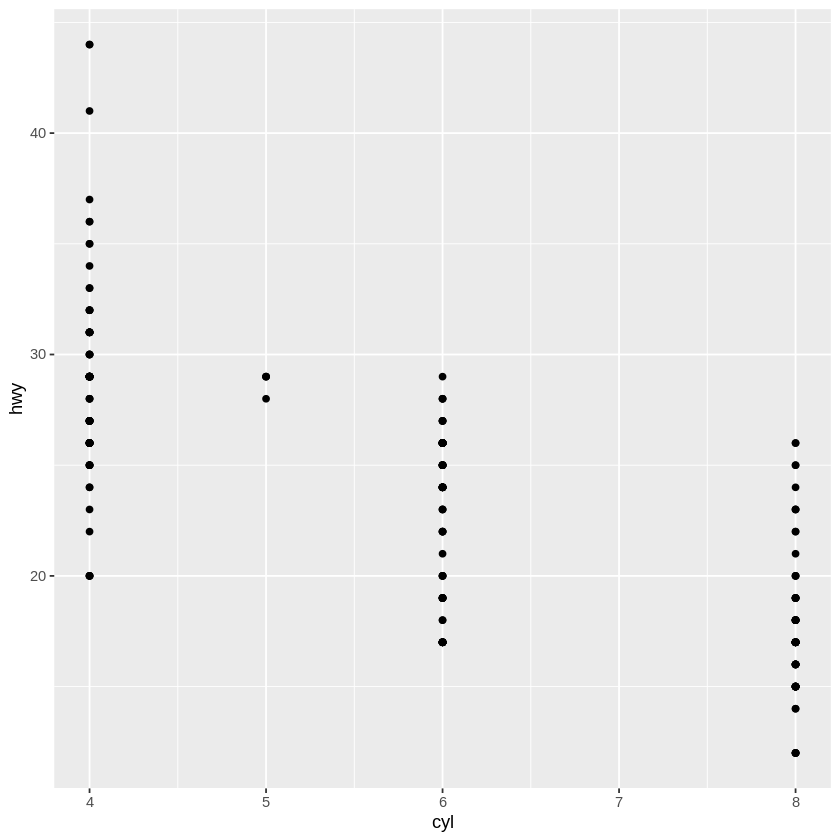

In [ ]:
ggplot(data =mpg)+
  geom_point(mapping = aes(x = cyl, y = hwy))

## We have seen that for higher  cylinder number  fuel efficuency dicreases

# Aesthetic Mappings

## Aesthetic 
Aesthetics
geom_point() understands the following aesthetics:

x

y

alpha

colour

fill

group

shape

size

stroke

In the following plot, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars?
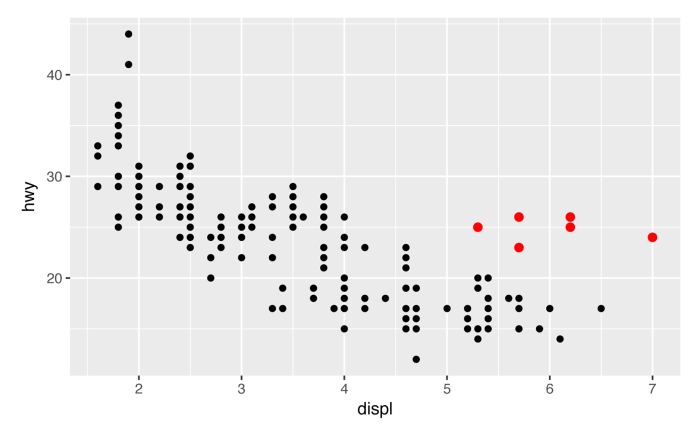

Let’s hypothesize that the cars are hybrids. One way to test this
hypothesis is to look at the class value for each car. The class vari‐
able of the mpg dataset classifies cars into groups such as compact,
midsize, and SUV. If the outlying points are hybrids, they should be
classified as compact cars or, perhaps, subcompact cars (keep in
mind that this data was collected before hybrid trucks and SUVs
became popular).

You can add a third variable, like class, to a two-dimensional scat‐
terplot by mapping it to an aesthetic. An aesthetic is a visual prop‐
erty of the objects in your plot. Aesthetics include things like the
size, the shape, or the color of your points. You can display a point
(like the one shown next) in different ways by changing the values of
its aesthetic properties. Since we already use the word “value” to describe data, let’s use the word “level” to describe aesthetic proper‐
ties. Here we change the levels of a point’s size, shape, and color to
make the point small, triangular, or blue:

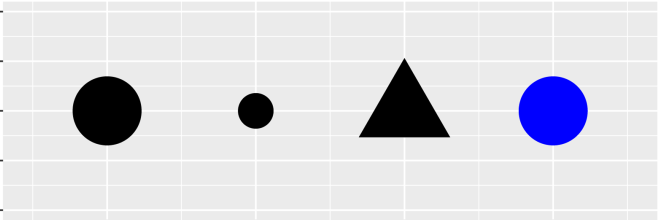

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the class variable to reveal the class of each car

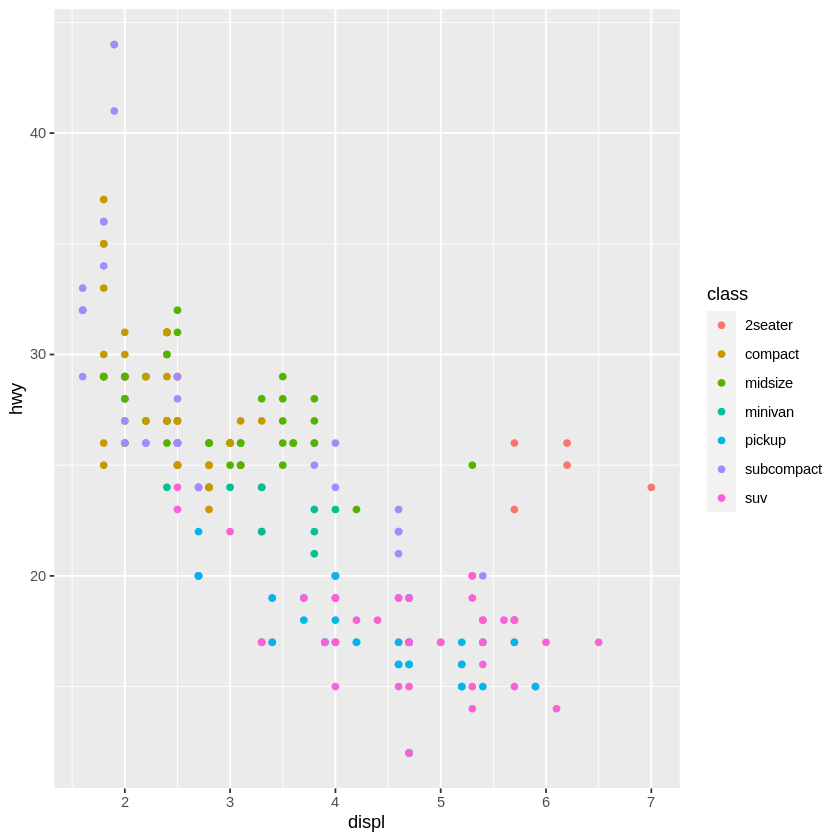

In [ ]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, color = class))

The colors reveal that many of the unusual points are two-seater
cars. These cars don’t seem like hybrids, and are, in fact, sports cars!
Sports cars have large engines like SUVs and pickup trucks, but
small bodies like midsize and compact cars, which improves their
gas mileage. In hindsight, these cars were unlikely to be hybrids
since they have large engines.

## Setting aesthetic properties of geom manually

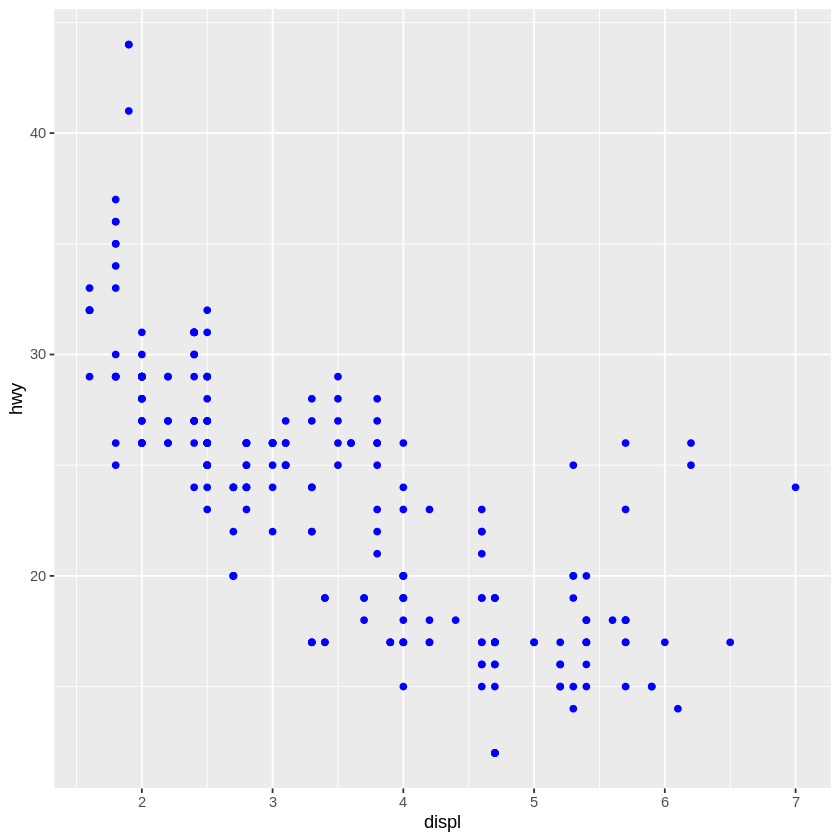

In [ ]:
ggplot(data = mpg)+
  geom_point(mapping = aes(x = displ, y = hwy), color = 'blue')

Here, the color doesn’t convey information about a variable, but only changes the appearance of the plot. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function; i.e., it goes outside of aes(). You’ll need to pick a value that makes sense for that aesthetic:

• The name of a color as a character string.

• The size of a point in mm.

• The shape of a point as a number

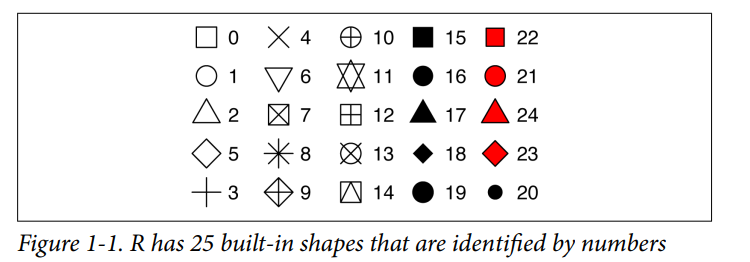

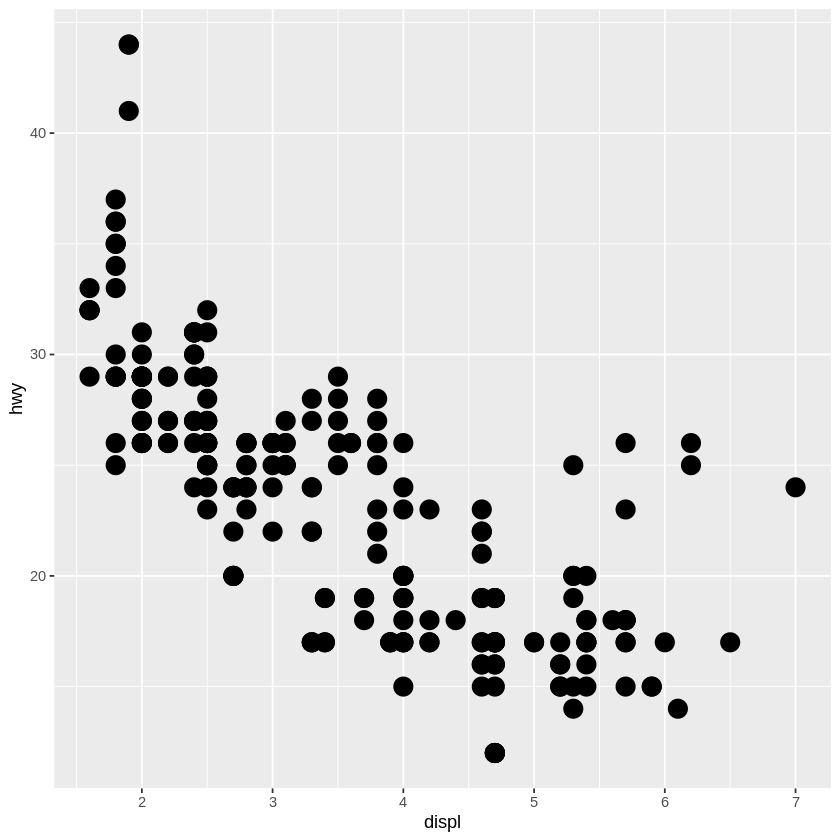

In [ ]:
ggplot(data = mpg)+
  geom_point(mapping = aes(x = displ, y = hwy), size = 5)

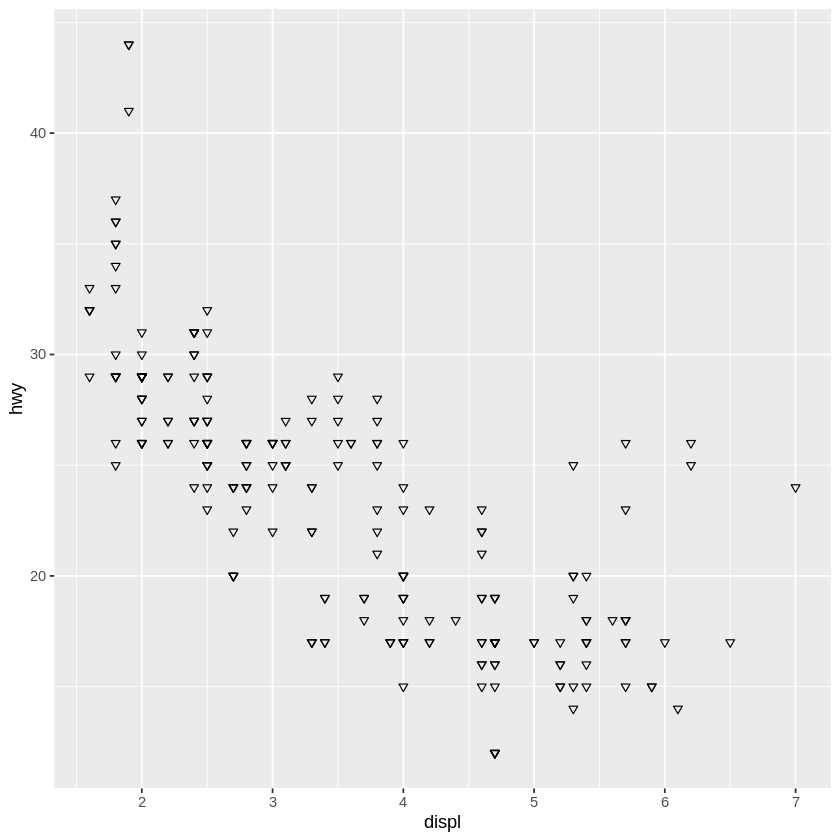

In [ ]:
ggplot(data = mpg)+
  geom_point(mapping = aes(x = displ, y = hwy), shape = 6)

## Excercise 1:
What’s gone wrong with this code? Why are the points not blue?
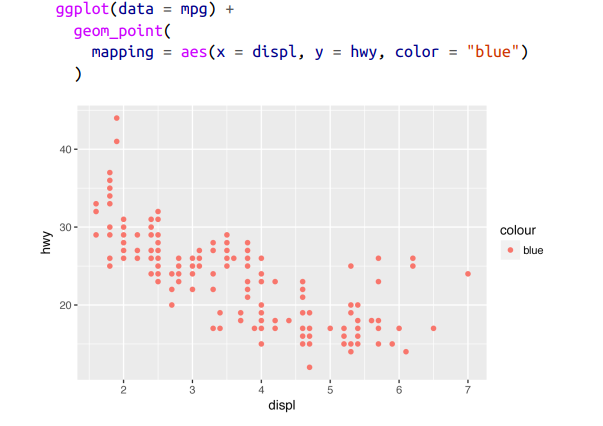

Answer : To set an aesthetic manually, set the aesthetic by name as an argument of your geom function; i.e., it goes outside of aes(). 

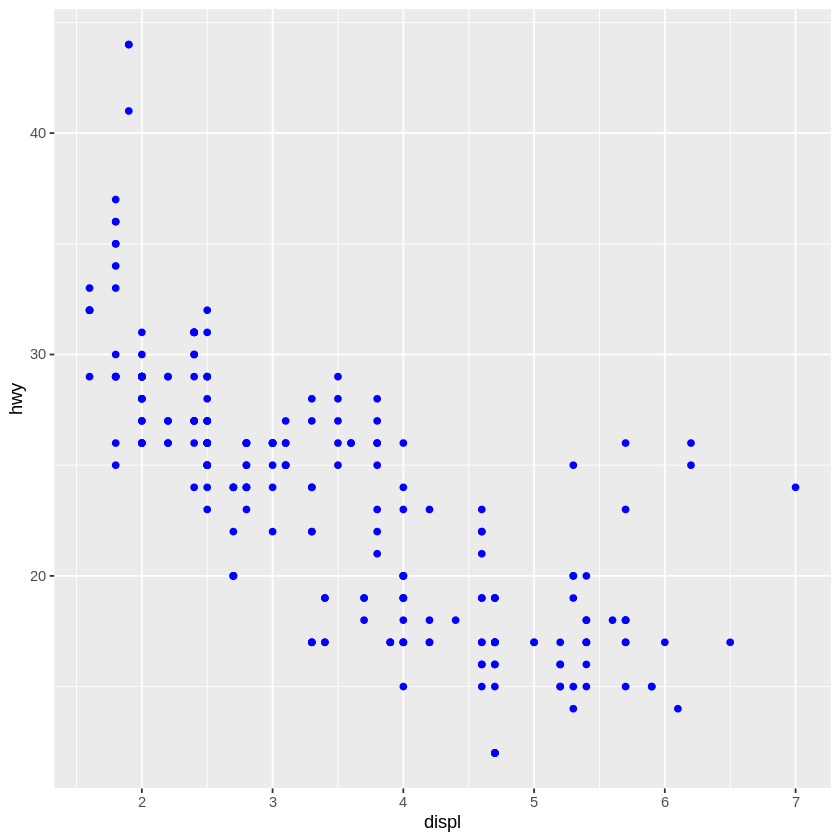

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

## Excercise 2:
Which variables in mpg are categorical? Which variables are
continuous? (Hint: type ?mpg to read the documentation for the
dataset.) How can you see this information when you run mpg?

In [ ]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


Ans:This will tell you the type of object you have; in the case of a data frame, it will also tell you how many rows (observations in statistical R-speak) and columns (variables to R) it contains, along with the type of data in each column and the first few entries in each column.

## Excercise 3
Map a continuous variable to color, size, and shape. How do
these aesthetics behave differently for categorical versus continuous variables?

"displ" is a contunuous variable.  lets map it to color , size and shape

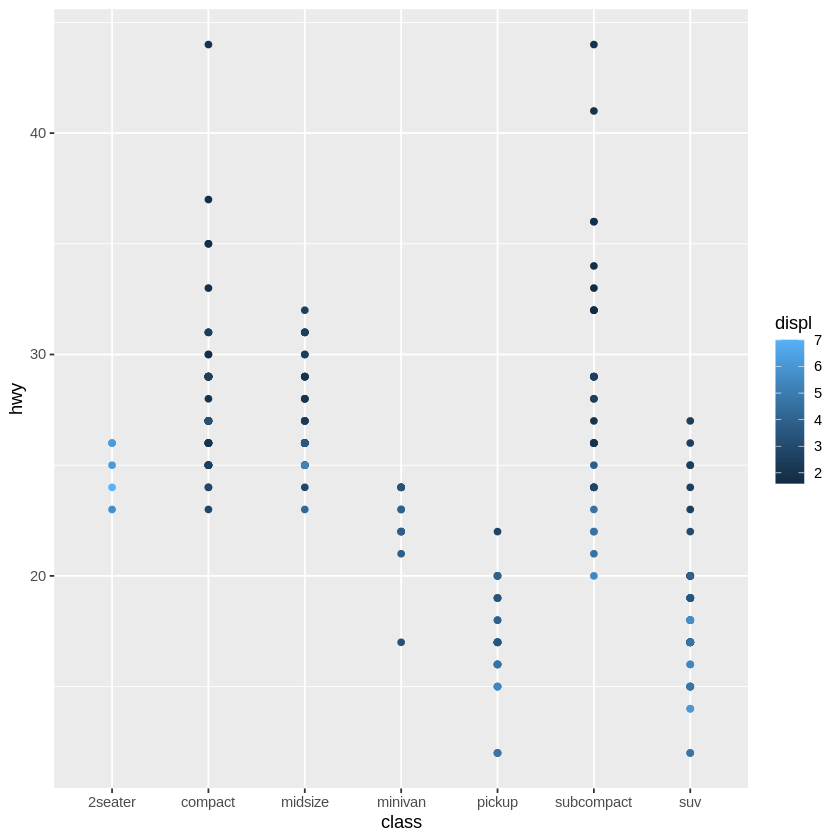

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = class, y = hwy, color = displ))

for all class, higher engine size provides less milage. 

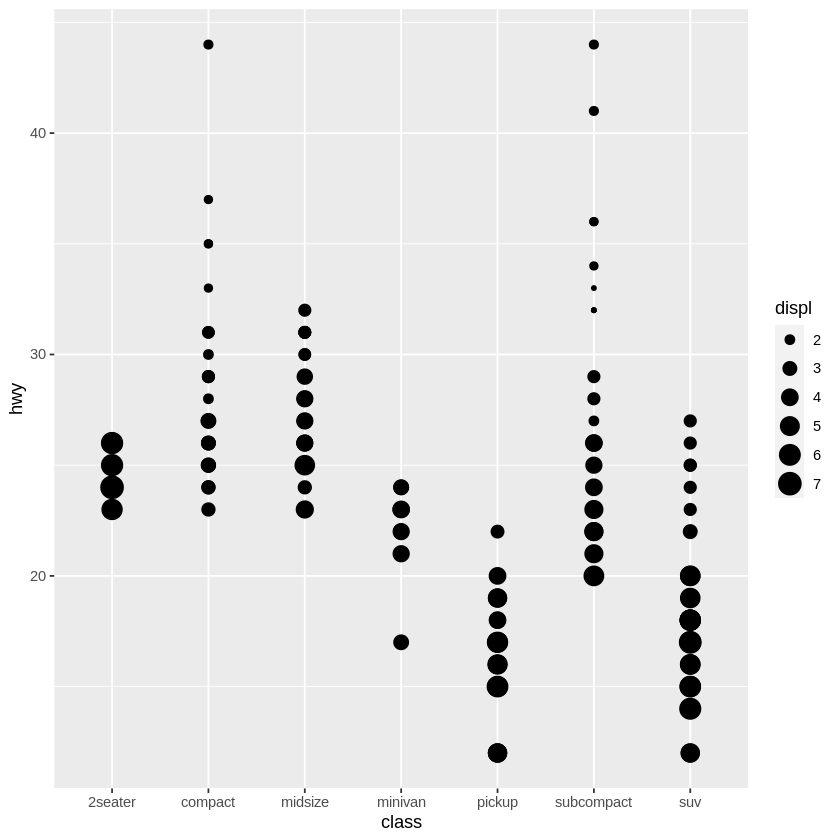

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = class, y = hwy, size = displ))

For all class, cars with higher engine higher has the lowest milage .

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

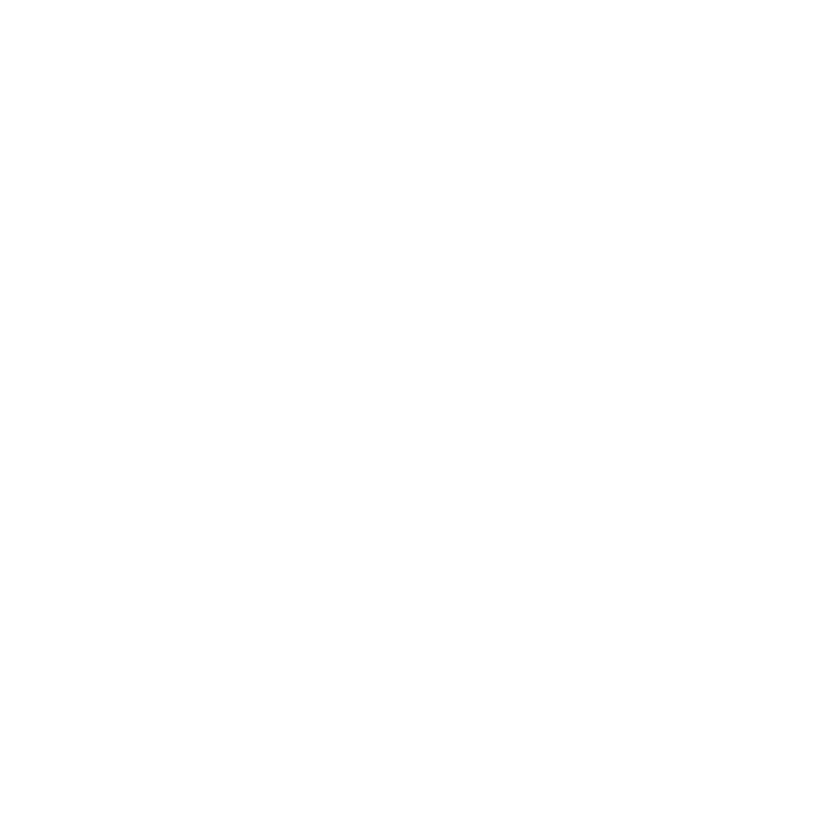

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = class, y = hwy, shape = displ))

since shape has limited options it cant provide all.

Lets see the difference  in the categorical value


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


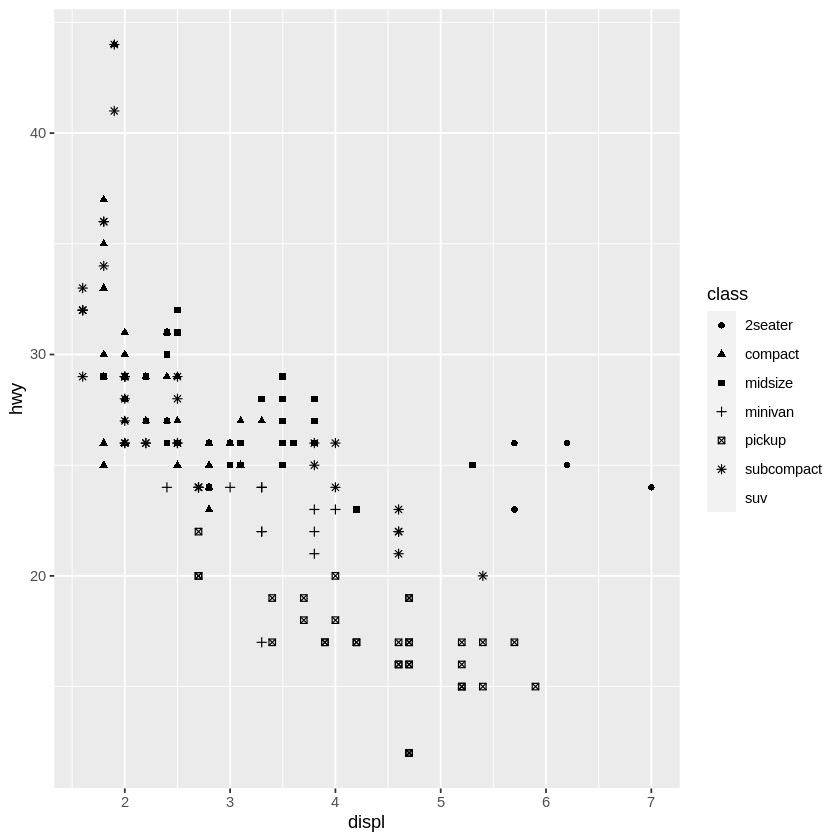

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

Warning message:
“Using size for a discrete variable is not advised.”


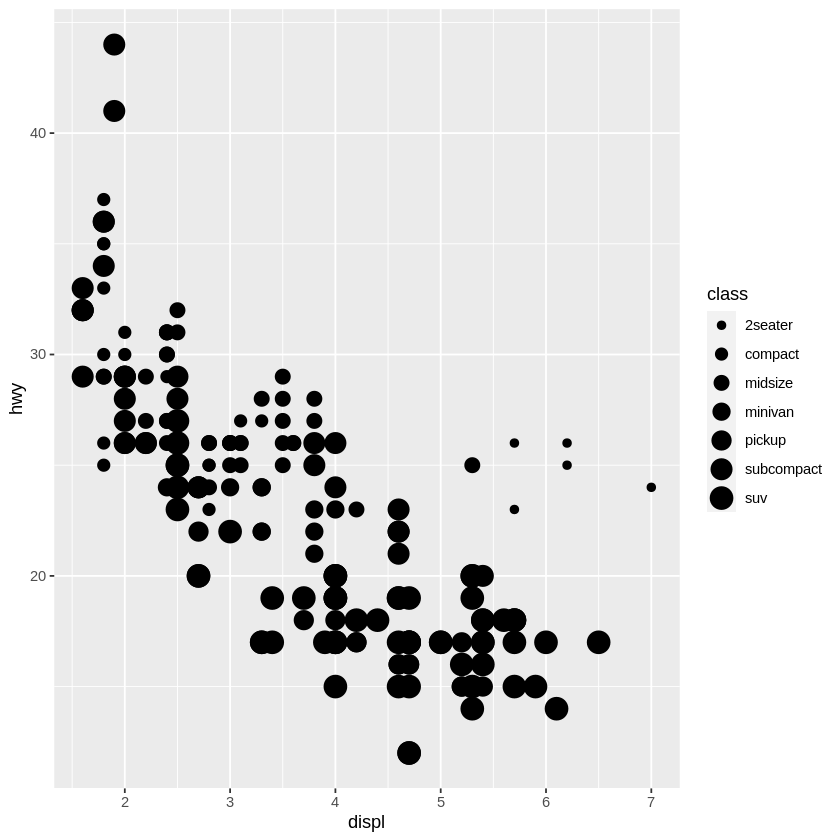

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

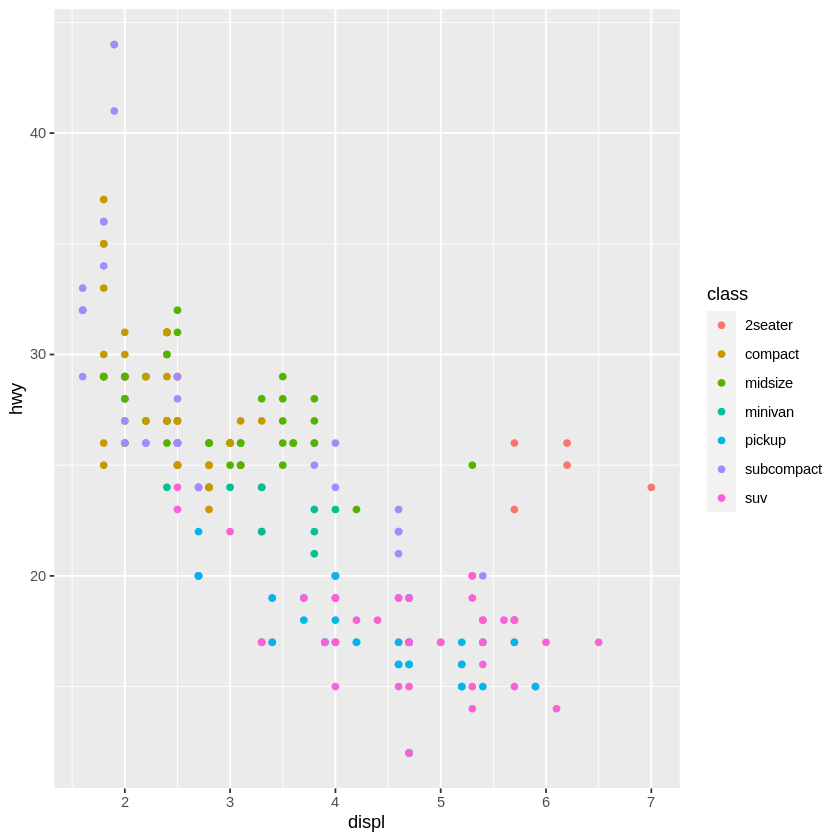

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

## Excercise 4
What does the stroke aesthetic do? What shapes does it work
with? 

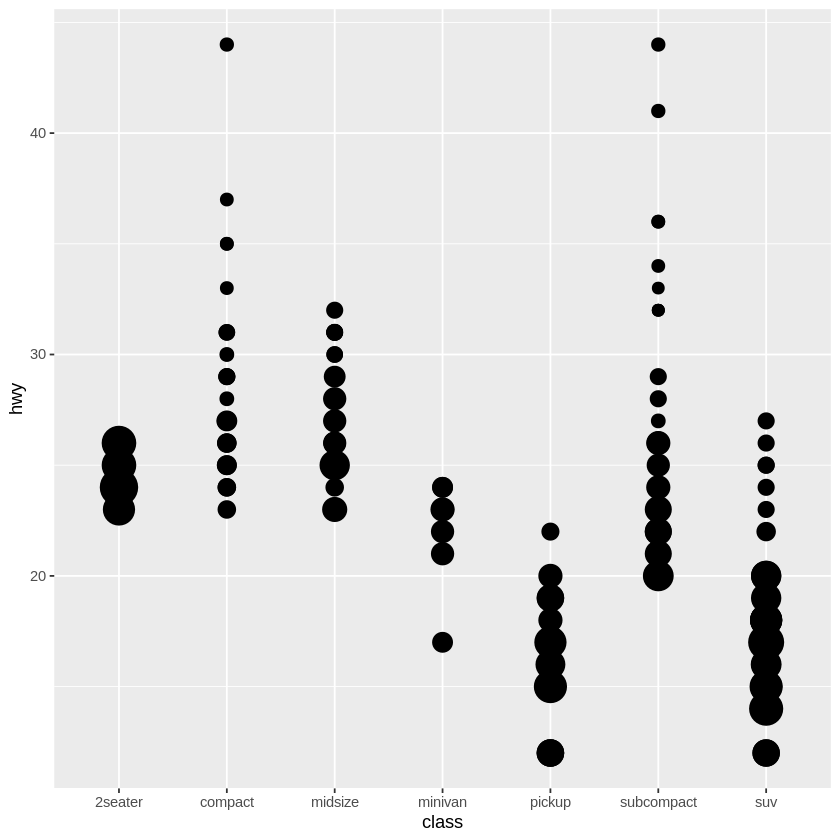

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = class, y = hwy, stroke = displ))

##  Excercise 6
What happens if you map an aesthetic to something other than
a variable name, like aes(color = displ < 5)?

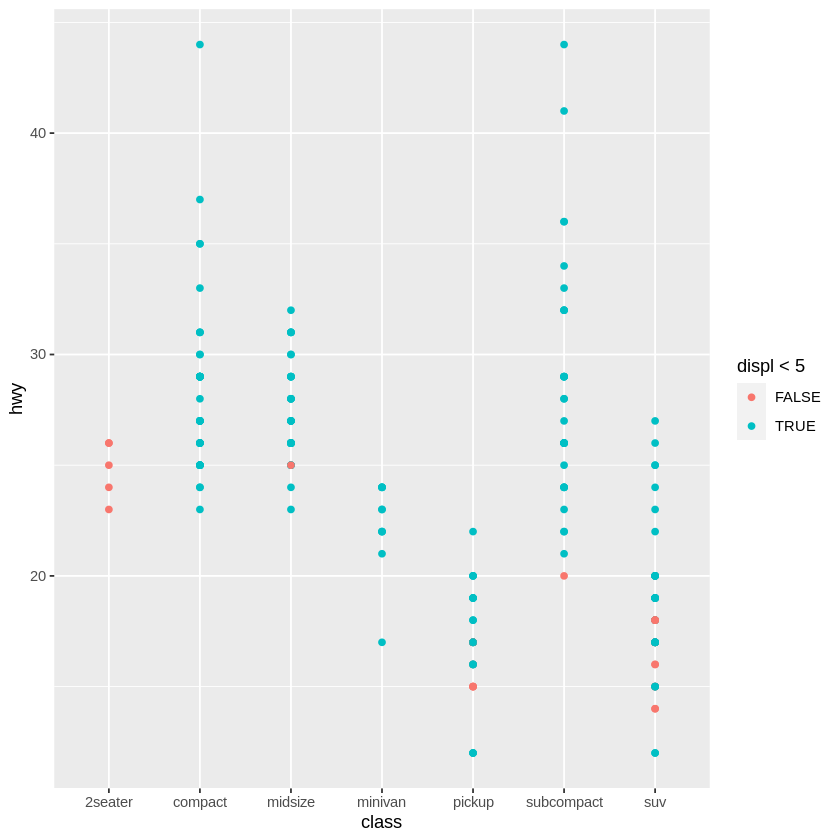

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = class, y = hwy, color = displ<5))

Warning message:
“Using alpha for a discrete variable is not advised.”


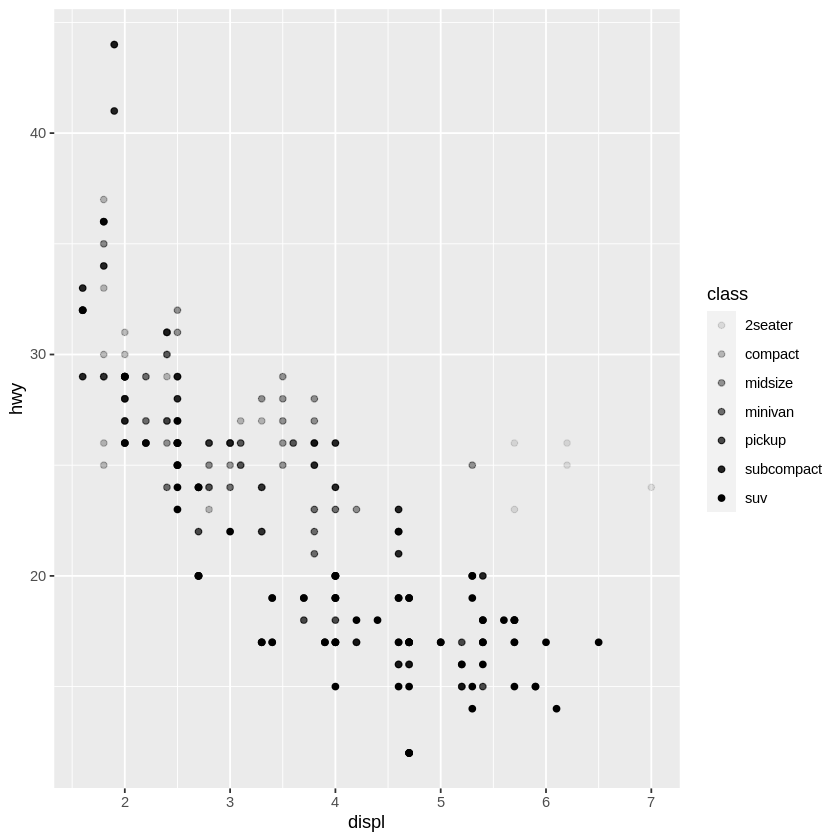

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

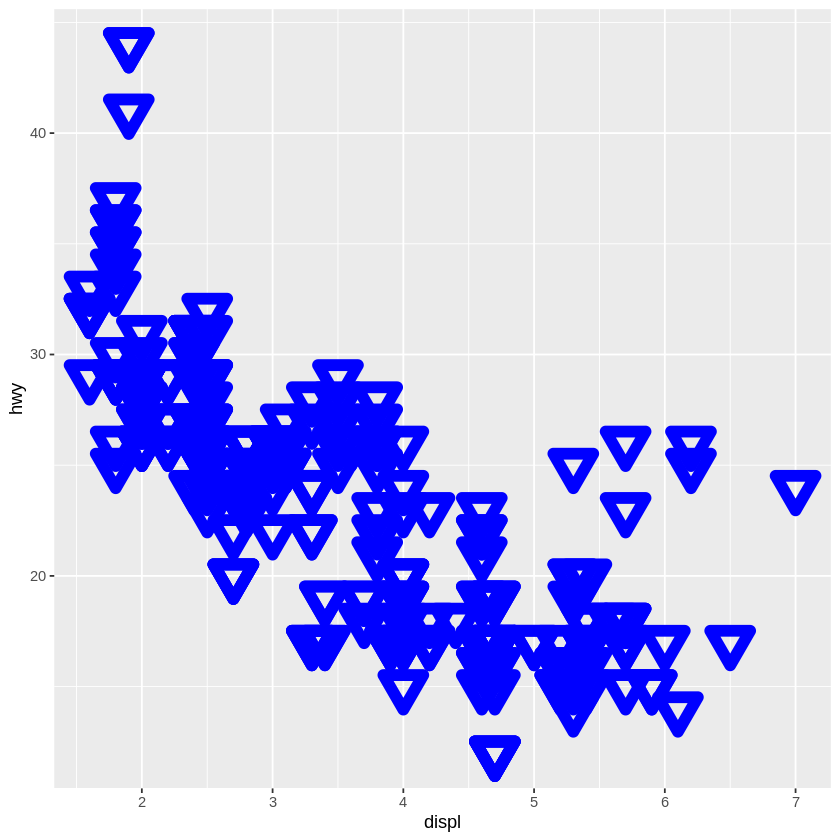

In [ ]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), shape = 6, color = 'blue', fill = 'white', size = 5, stroke = 5)